In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.segments import * 
from trajectory.planner import * 
from trajectory.plot import * 
from trajectory.trapmath import * 
import matplotlib.pyplot as plt
from IPython.display import display
import trajectory as tj
import pandas as pd
import numpy as np
from math import sqrt
from random import randint, random

pd.set_option('display.max_columns', None)

[False, False, False]
[False, False, False]
[None, None, None]


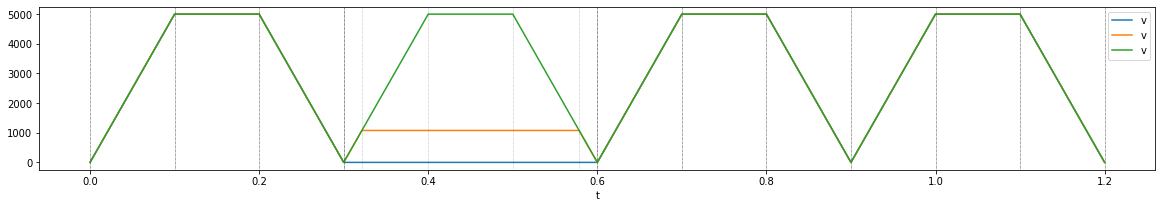

[False, False, False]
[False, False, False]
[False, False, False]


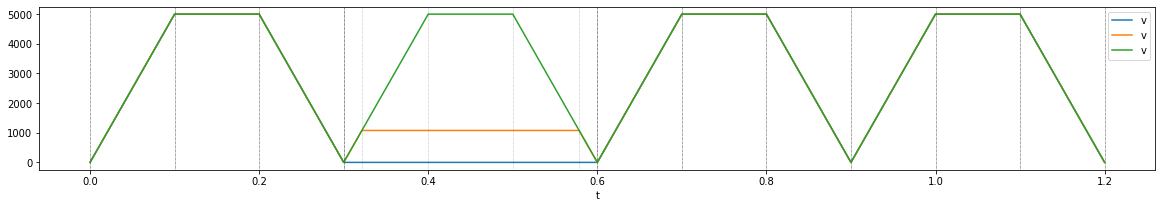

[False, False, False]
[False, False, False]
[False, False, False]


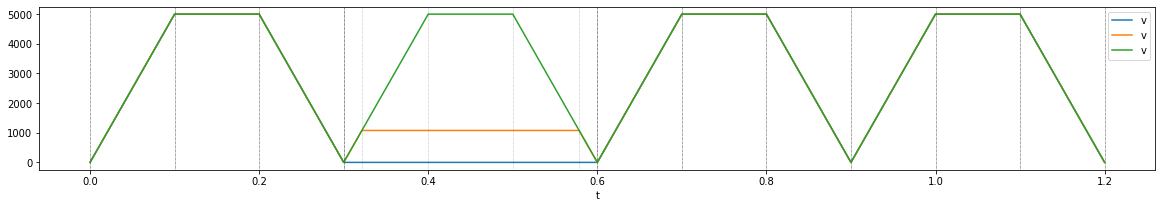

[None, None, None]
[True, True, True]
[True, True, True]


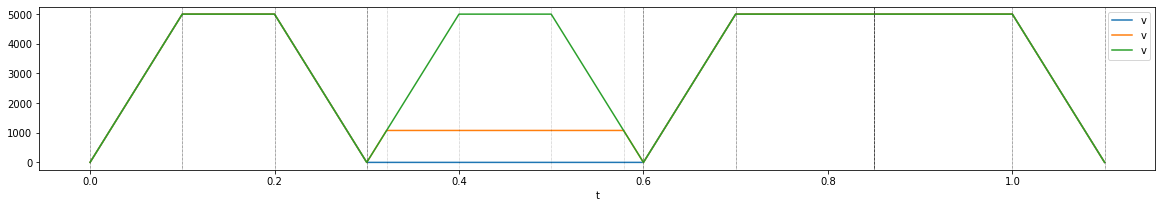

In [41]:
from operator import attrgetter
from itertools import chain

j = Joint(5_000, 50_000)
joints = [j]*3

ag_ha = attrgetter(*'t v_0 v_c v_1 a_max'.split())
ag = attrgetter(*'x t v_0 v_c v_1 v_0_max v_1_max'.split())

def aca(e):
    if e[0]:
        assert_consistent_area(e[0])

    assert_consistent_area(e[1])
    if e[2]:
        assert_consistent_area(e[2])
   
def _update(sl, index):

    w = sl.get_window(index)
    
    for p in chain(*w):
        clear_segment_flags(p)
    
    m = [save_for_change(s) for s in w ]
    
    for e in w:
        update_segment(e)
   
    for e in zip(*w):
        aca(e)
        update_boundary_velocities(*e)
                  
    for p in chain(*w):
        min_time_parameters_p(p, inplace = True, as_needed=True)
        
    # the idx number indicates how to move through the segments list to
    # do the next update. if there are no changes, you advance by one, to the
    # end, but if the prior change, you need to go back one.

    idx_change = 1
    for s, m_, ic in zip(reversed(w), reversed(m), (1,0,-1)):
        r = mark_saved_change(s, m_)
        print(r)
        if any(r):
            idx_change = ic

    index += idx_change
    return index

def update(sl):
    index = -1
    for i in range(10):
        index =  _update(sl,index)
        print("Loop", i, 'index', index)
        if index == 0:
            break
    else:
        assert False, "Update overflow"
            
    sl.plot(); plt.show()

sl = SegmentList(joints)   
s = sl.rmove([1000,1000,1000])
s = sl.rmove([0,   300, 1000])
s = sl.rmove([1000,1000,1000])
s = sl.rmove([1000,1000,1000])

for i in range(-len(sl), 0):
    _update(sl, i)
    sl.plot(); plt.show()

[False, False, False]
[False, False, False]
[False, False, False]


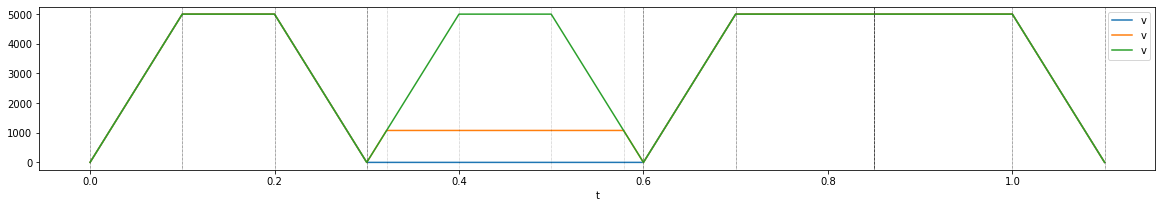

[False, False, False]
[False, False, False]
[False, False, False]


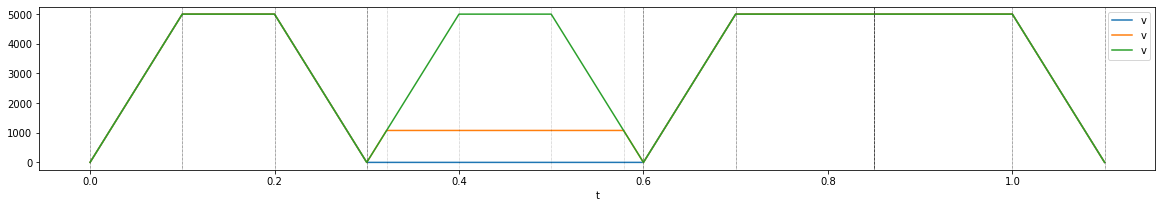

[None, None, None]
[False, False, False]
[False, False, False]


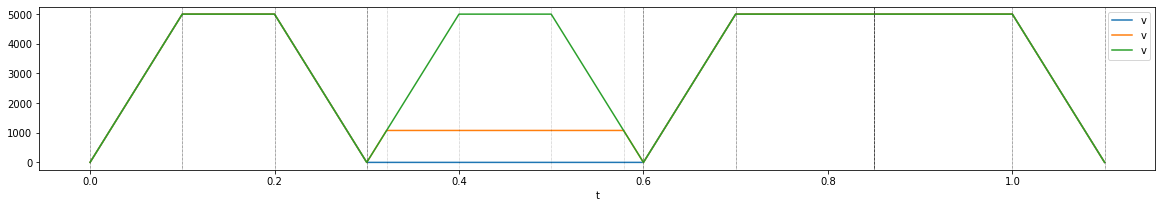

In [39]:
_update(sl, -3)
sl.plot(); plt.show()
_update(sl, -2)
sl.plot(); plt.show()
_update(sl, -1)
sl.plot(); plt.show()